# Linear SVM Classification

## Soft Margin Classification

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)] #petal length, petal width
y = (iris['target']==2).astype(np.float64) #iris-virginica

In [3]:
svm_clf = Pipeline((
    ("scaler", StandardScaler()),
    ('linear_svc',LinearSVC(C=1,loss='hinge'))
))

In [4]:
svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

In [5]:
svm_clf.predict([[5.5,1.7]]) # length 5.5 cm, width 1.7 cm

array([ 1.])

## Non-Linear SVM Classification

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [7]:
polynomial_svm_clf = Pipeline((
    ("poly_features", PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10,loss='hinge'))
))

In [8]:
polynomial_svm_clf.fit(X,y)

Pipeline(steps=(('poly_features', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', LinearSVC(C=10, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))))

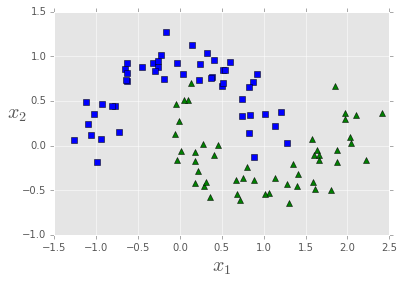

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

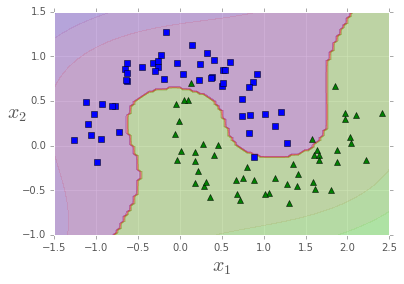

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

## Gaussian RBF Kernel

In [12]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='rbf',gamma=5,C=0.001))
    ))

In [13]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm_clf', SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))))

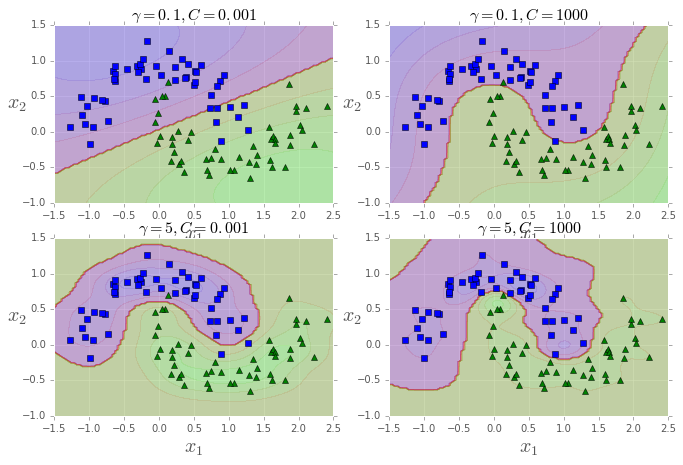

In [16]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

plt.figure(figsize=(11, 7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221 + i)
    plot_predictions(svm_clf, [-1.5, 2.5, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)


## SVM Regression

In [17]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [18]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [19]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel='poly',degree=2,C=100, epsilon=0.1)

# Exercises

In [1]:
#use SVC on a linearly separable dataset
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [10]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
C = 5

svm_linear = LinearSVC(C=C, loss='hinge',random_state=42)
svm_svc = SVC(kernel = 'linear',C=C, random_state = 42)
sgd = SGDClassifier(random_state = 42)

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

svm_linear.fit(X_scaled, y)
svm_svc.fit(X_scaled, y)
sgd.fit(X_scaled, y)

print("LinearSVC:                   ", svm_linear.intercept_, svm_linear.coef_)
print("SVC:                         ", svm_svc.intercept_, svm_svc.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd.alpha), sgd.intercept_, sgd.coef_)

('LinearSVC:                   ', array([ 0.28480668]), array([[ 1.05542422,  1.09851637]]))
('SVC:                         ', array([ 0.31933577]), array([[ 1.1223101 ,  1.02531081]]))
('SGDClassifier(alpha=0.00010):', array([-0.12833169]), array([[ 9.71990897,  9.47182331]]))
